## CAMELS Australia


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AtrCheema/ai4water_examples/blob/master/docs/source/_notebooks/datasets/CAMELS_AUS.ipynb)

[![View Source on GitHub](https://img.shields.io/badge/github-view%20source-black.svg)](https://github.com/AtrCheema/ai4water_examples/blob/master/docs/source/_notebooks/datasets/CAMELS_AUS.ipynb)


This notebook explores CAMELS Australia dataset which was introduced in [Fowler et al., 2020](https://essd.copernicus.org/articles/13/3847/2021/). 

In [1]:
import pandas as pd
import numpy as np

from ai4water.datasets import CAMELS_AUS
from ai4water.utils.utils import get_version_info
from ai4water.eda import EDA

import matplotlib.pyplot as plt

from easy_mpl import hist, ridge, scatter
from easy_mpl.utils import process_cbar


**********Tensorflow models could not be imported **********



C:\Users\ather\.conda\envs\cat_aware\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
for k,v in get_version_info().items():
    print(k, v)

python 3.8.17 (default, Jul  5 2023, 20:44:21) [MSC v.1916 64 bit (AMD64)]
os nt
ai4water 1.07
easy_mpl 0.21.3
SeqMetrics 1.3.4
numpy 1.24.3
pandas 1.3.4
matplotlib 3.6.0
sklearn 1.3.0
xarray 0.20.1
netCDF4 1.5.7
seaborn 0.12.2


In [4]:

dataset = CAMELS_AUS(
    path=r"E:\data\gscad\CAMELS\CAMELS_AUS"  # set path to None if you have not already downloaded data
)


In [5]:
dataset.start

'19570101'

In [6]:
dataset.end

'20181231'

In [7]:
stations = dataset.stations()
len(stations)

222

### Static Features

In [8]:
dataset.static_features

['station_name',
 'drainage_division',
 'river_region',
 'notes',
 'lat_outlet',
 'long_outlet',
 'lat_centroid',
 'long_centroid',
 'map_zone',
 'catchment_area',
 'nested_status',
 'next_station_ds',
 'num_nested_within',
 'start_date',
 'end_date',
 'prop_missing_data',
 'q_uncert_num_curves',
 'q_uncert_n',
 'q_uncert_q10',
 'q_uncert_q10_upper',
 'q_uncert_q10_lower',
 'q_uncert_q50',
 'q_uncert_q50_upper',
 'q_uncert_q50_lower',
 'q_uncert_q90',
 'q_uncert_q90_upper',
 'q_uncert_q90_lower',
 'p_mean',
 'pet_mean',
 'aridity',
 'p_seasonality',
 'frac_snow',
 'high_prec_freq',
 'high_prec_dur',
 'high_prec_timing',
 'low_prec_freq',
 'low_prec_dur',
 'low_prec_timing',
 'q_mean',
 'runoff_ratio',
 'stream_elas',
 'slope_fdc',
 'baseflow_index',
 'hdf_mean',
 'Q5',
 'Q95',
 'high_q_freq',
 'high_q_dur',
 'low_q_freq',
 'low_q_dur',
 'zero_q_freq',
 'geol_prim',
 'geol_prim_prop',
 'geol_sec',
 'geol_sec_prop',
 'unconsoldted',
 'igneous',
 'silicsed',
 'carbnatesed',
 'othersed',
 

In [9]:
mrvbf = 'proportion of catchment occupied by classes of MultiResolution Valley Bottom Flatness'
lc01 = 'land cover codes'
nvis = 'vegetation sub-groups'
anngro = 'Average annual growth index value for some plants'
gromega = 'Seasonality of growth index value'
npp = 'net primary productivity'

In [10]:
static = dataset.fetch_static_features(stn_id=stations)
static.shape

(222, 161)

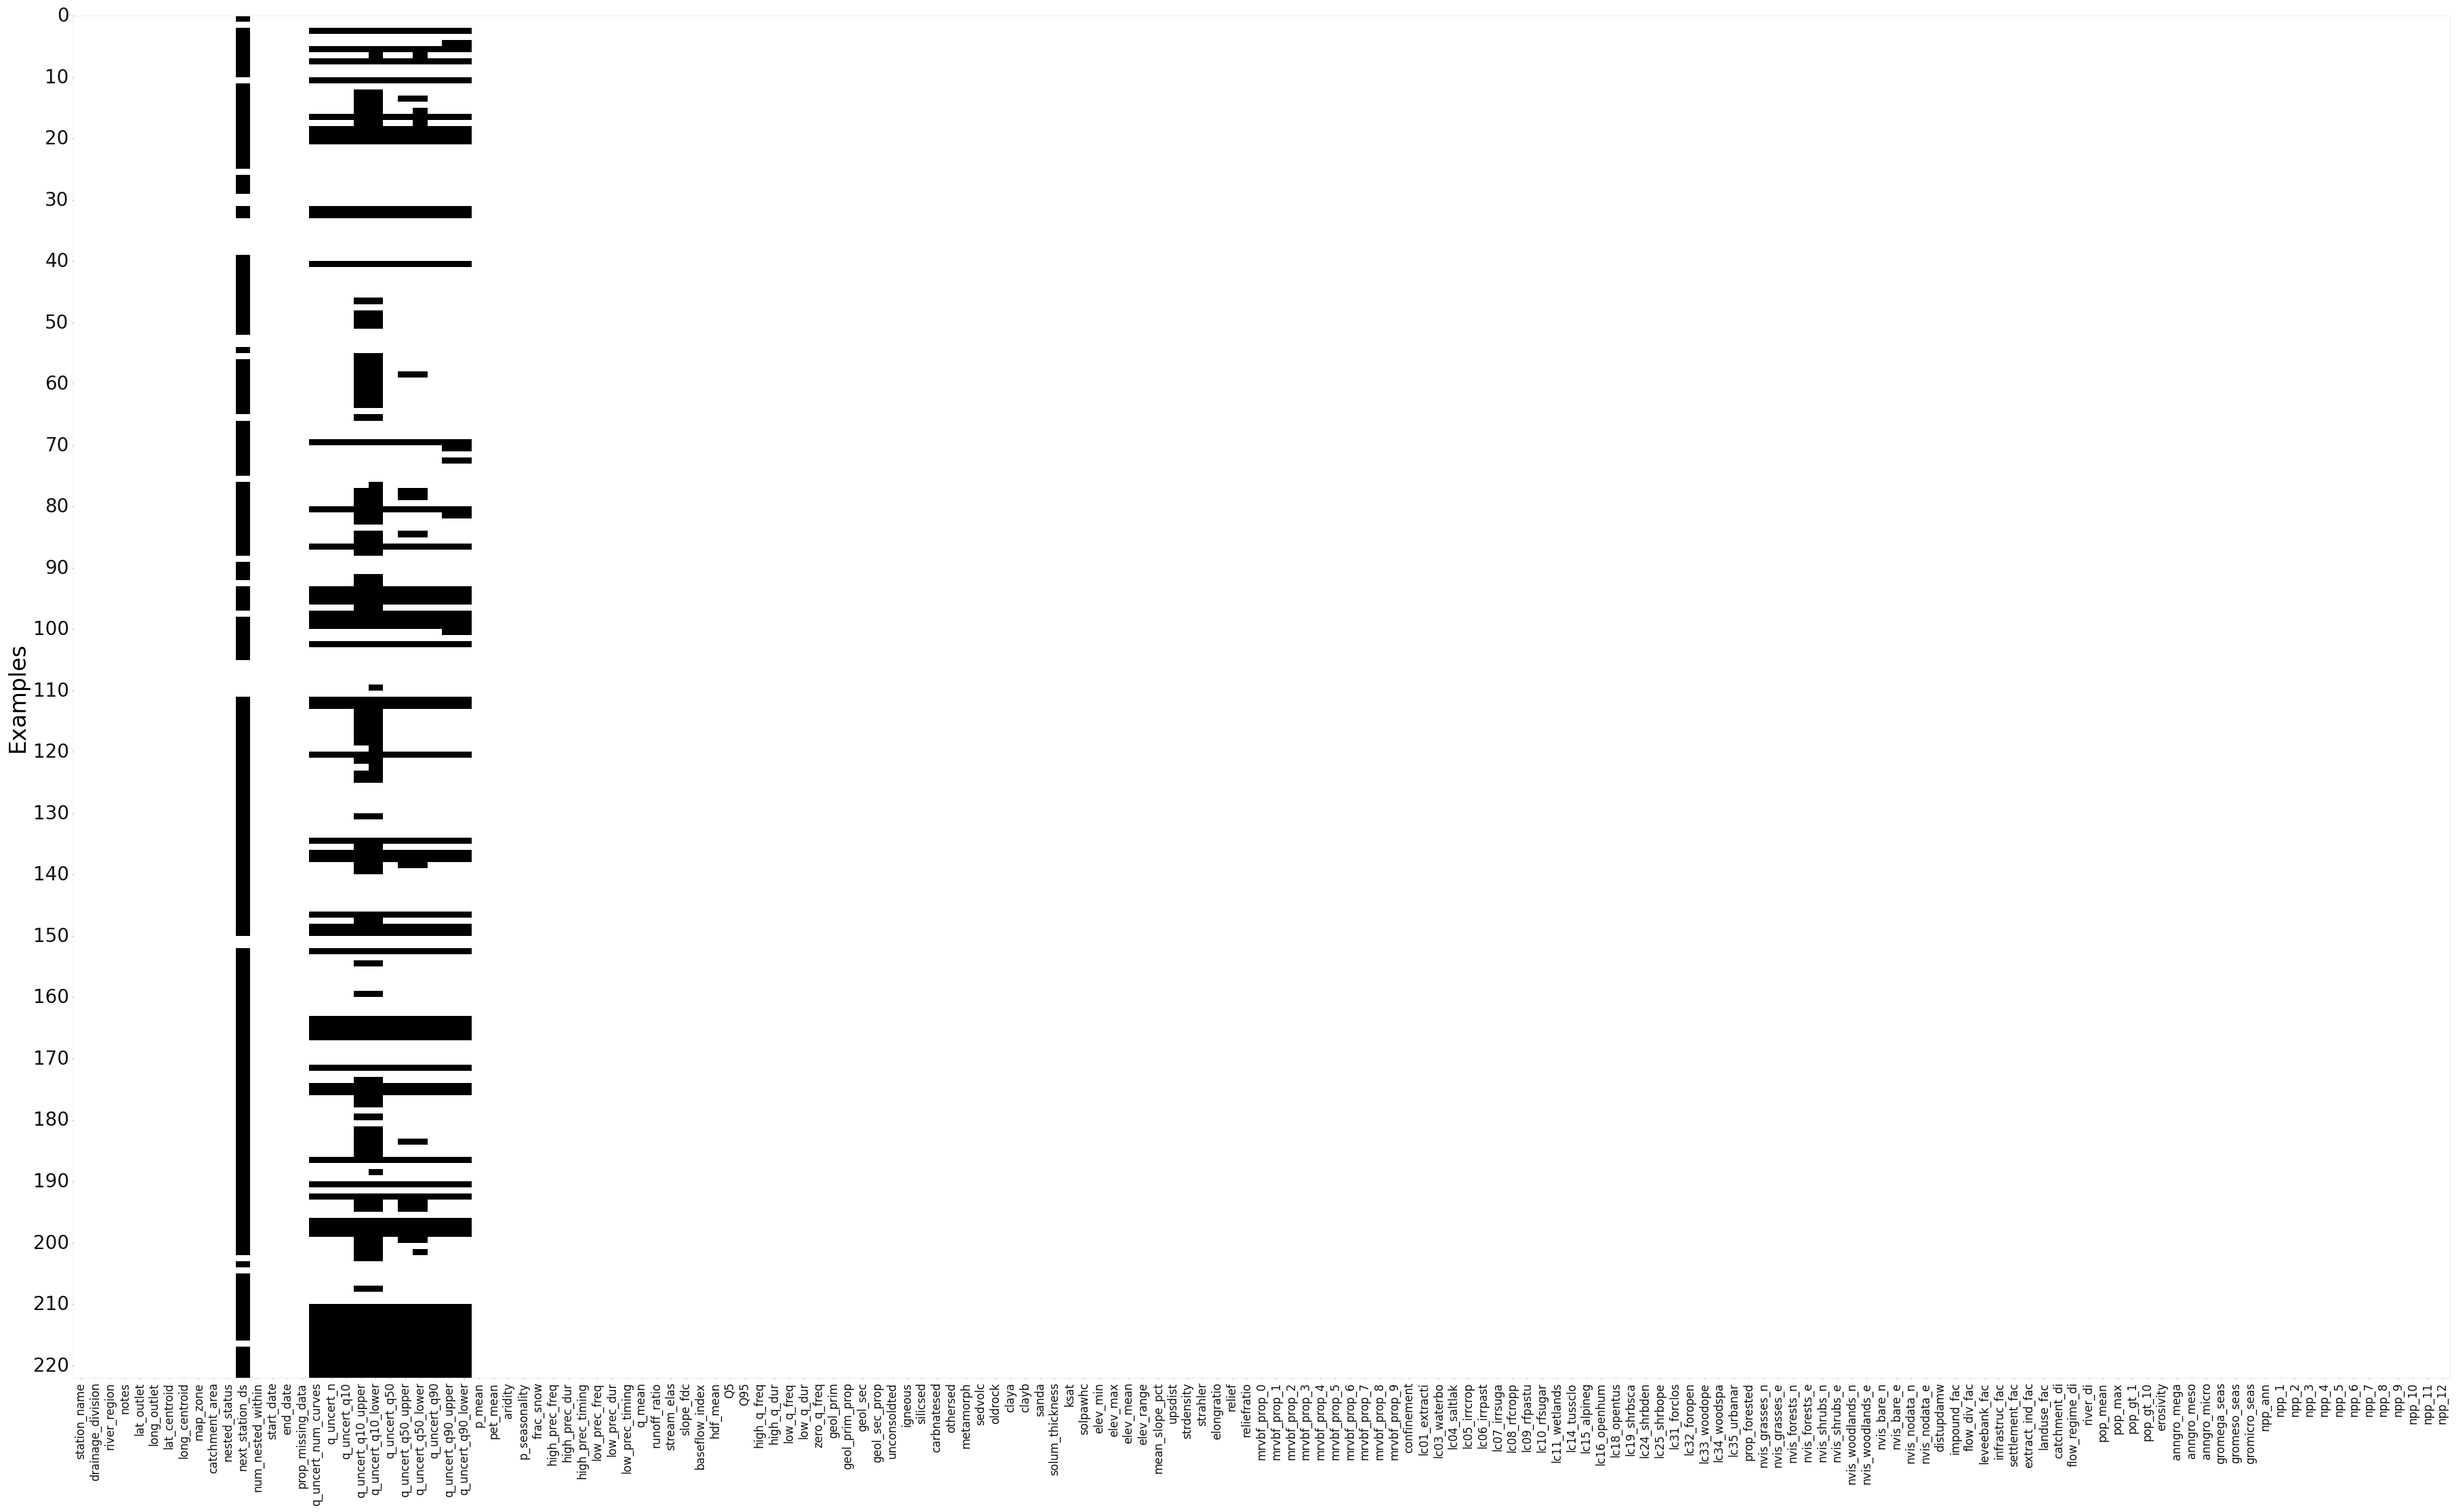

<AxesSubplot: ylabel='Examples'>

In [11]:
EDA(data=static, save=False).heatmap()

In [12]:
physical_features = []
soil_features = []
geological_features = []
flow_characteristics = []

In [13]:
static = static.dropna(axis=1)
static.shape

(222, 149)

In [14]:
coords = dataset.stn_coords()
coords

lat        long
station_id                       
912101A    -18.643611  139.253056
912105A    -18.970833  138.803333
915011A    -20.177500  144.524444
917107A    -18.133611  144.306667
919003A    -16.471389  144.290556
...               ...         ...
312061     -41.419444  145.670556
314207     -41.250833  146.090000
314213     -40.872222  145.297778
315450     -41.611667  146.130556
318076     -41.494444  147.384167

[222 rows x 2 columns]

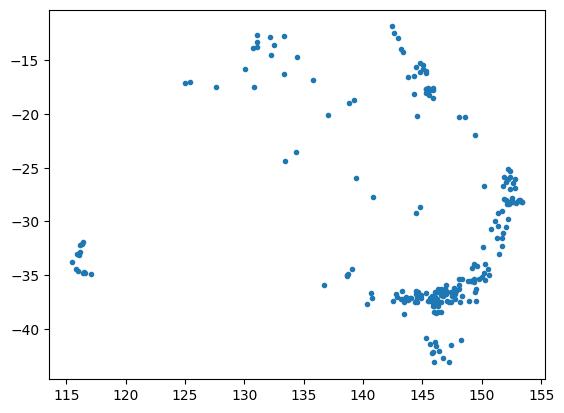

<AxesSubplot: >

In [15]:
dataset.plot_stations()

In [16]:
lat = coords['lat'].astype(float).values.reshape(-1,)
long = coords['long'].astype(float).values.reshape(-1,)

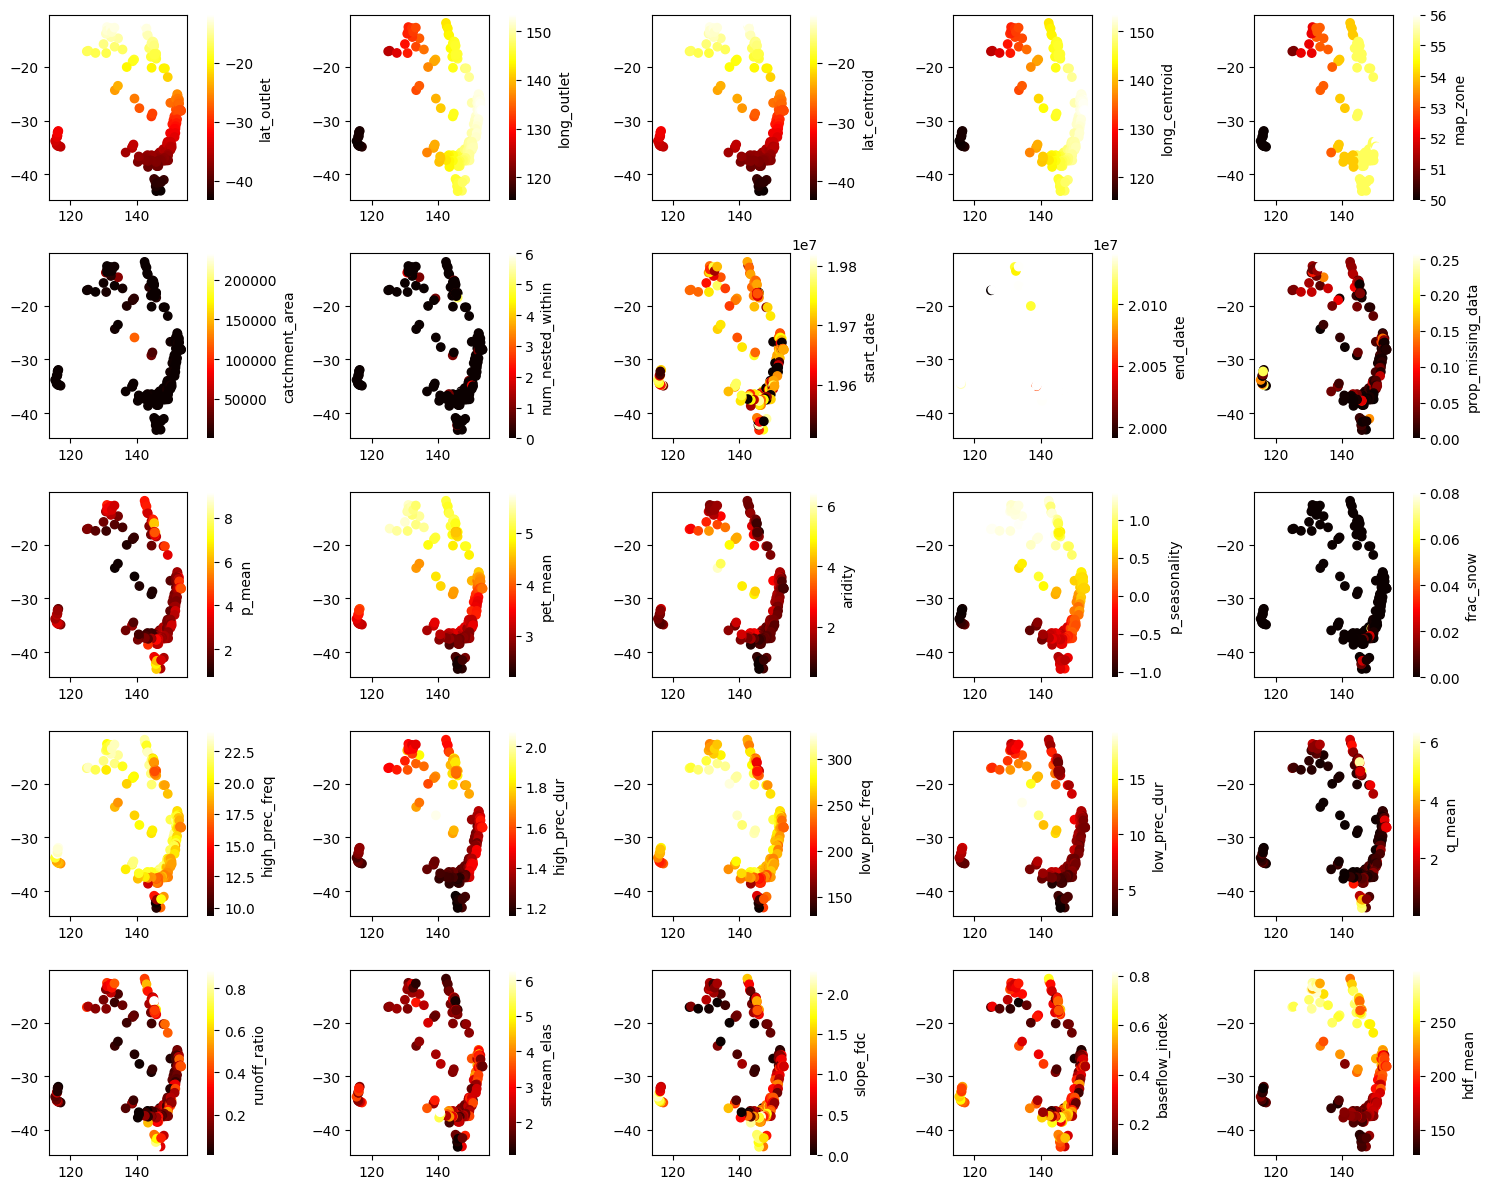

32


In [17]:
idx = 0
ax_num = 0

fig, axes = plt.subplots(5, 5, figsize=(15, 12))
axes = axes.flatten()

while ax_num < 25:
    
    val = static.iloc[:, idx]
    idx += 1
    
    try:
        c = val.astype(float).values.reshape(-1,)
             
        en = 222
        ax = axes[ax_num]
        ax, sc = scatter(long[0:en], lat[0:en], c=c[0:en], cmap="hot", show=False, ax=ax) 

        process_cbar(ax, sc, border=False, title=val.name, #title_kws ={"fontsize": 14}
                    )
        ax_num += 1
    except ValueError:
        continue
    


plt.tight_layout()
plt.show()
print(idx)

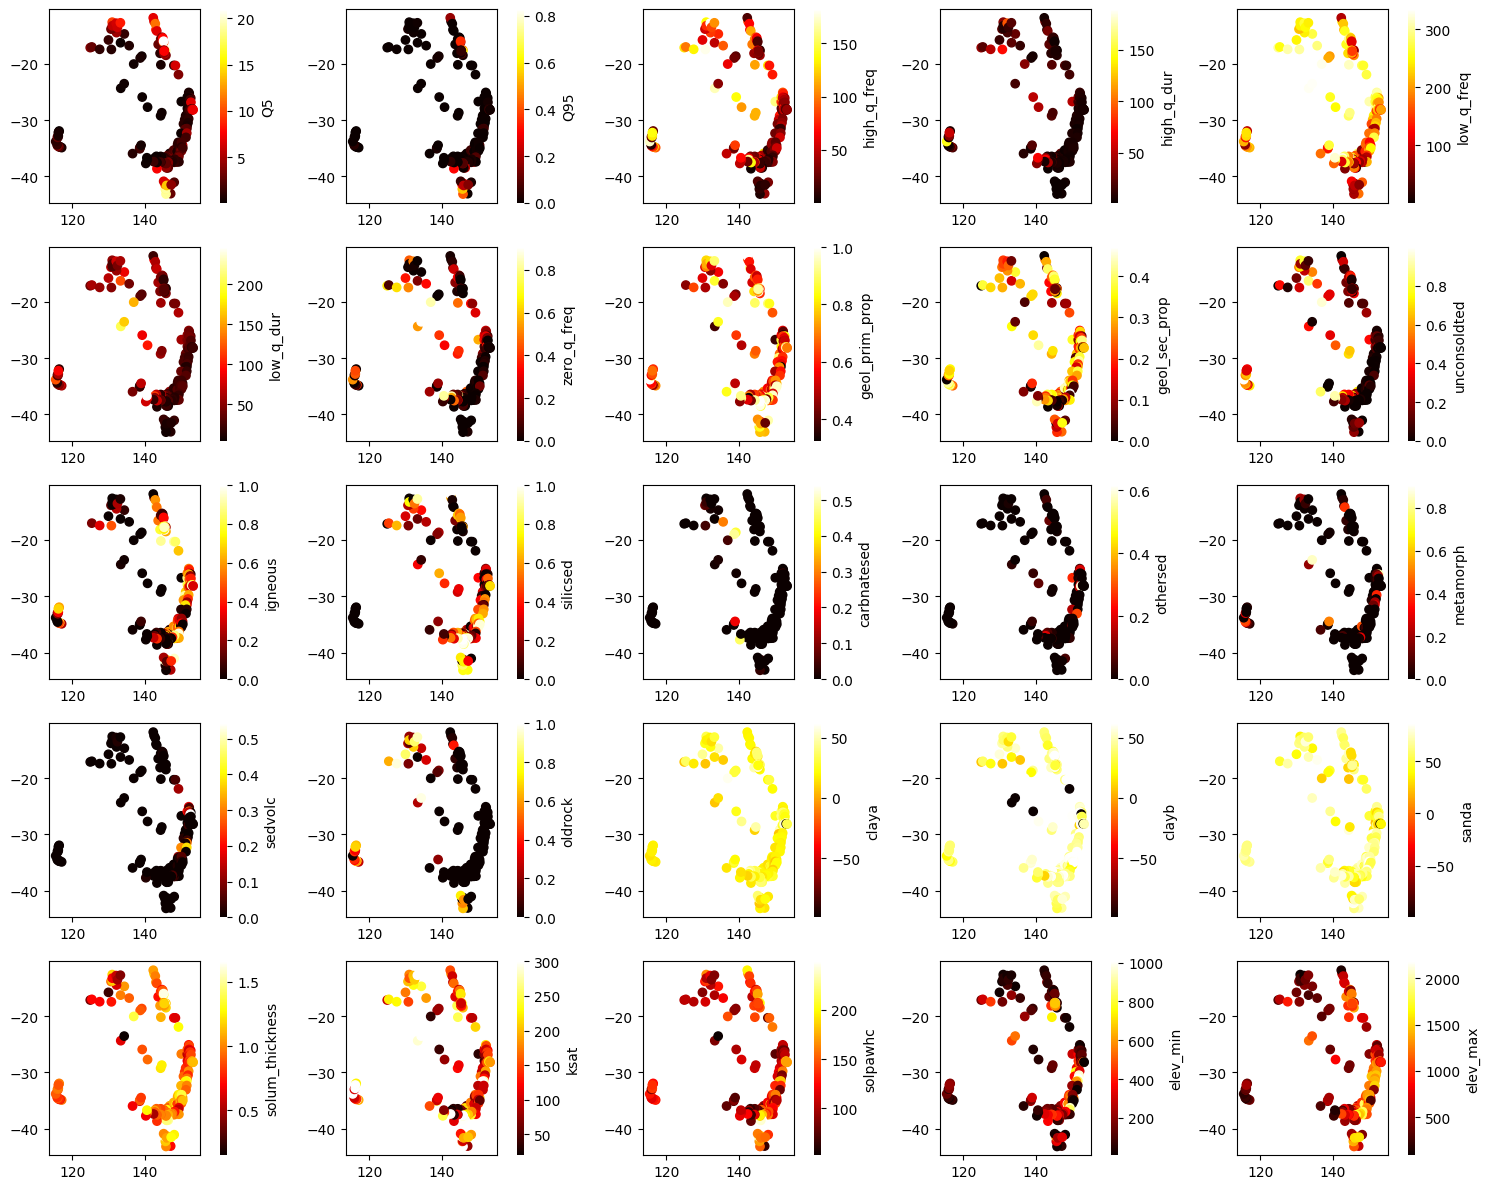

59


In [18]:
idx = 32
ax_num = 0

fig, axes = plt.subplots(5, 5, figsize=(15, 12))
axes = axes.flatten()

while ax_num < 25:
    
    val = static.iloc[:, idx]
    idx += 1
    
    try:
        c = val.astype(float).values.reshape(-1,)
             
        en = 222
        ax = axes[ax_num]
        ax, sc = scatter(long[0:en], lat[0:en], c=c[0:en], cmap="hot", show=False, ax=ax) 

        process_cbar(ax, sc, border=False, title=val.name, #title_kws ={"fontsize": 14}
                    )
        ax_num += 1
    except ValueError:
        continue
    


plt.tight_layout()
plt.show()
print(idx)

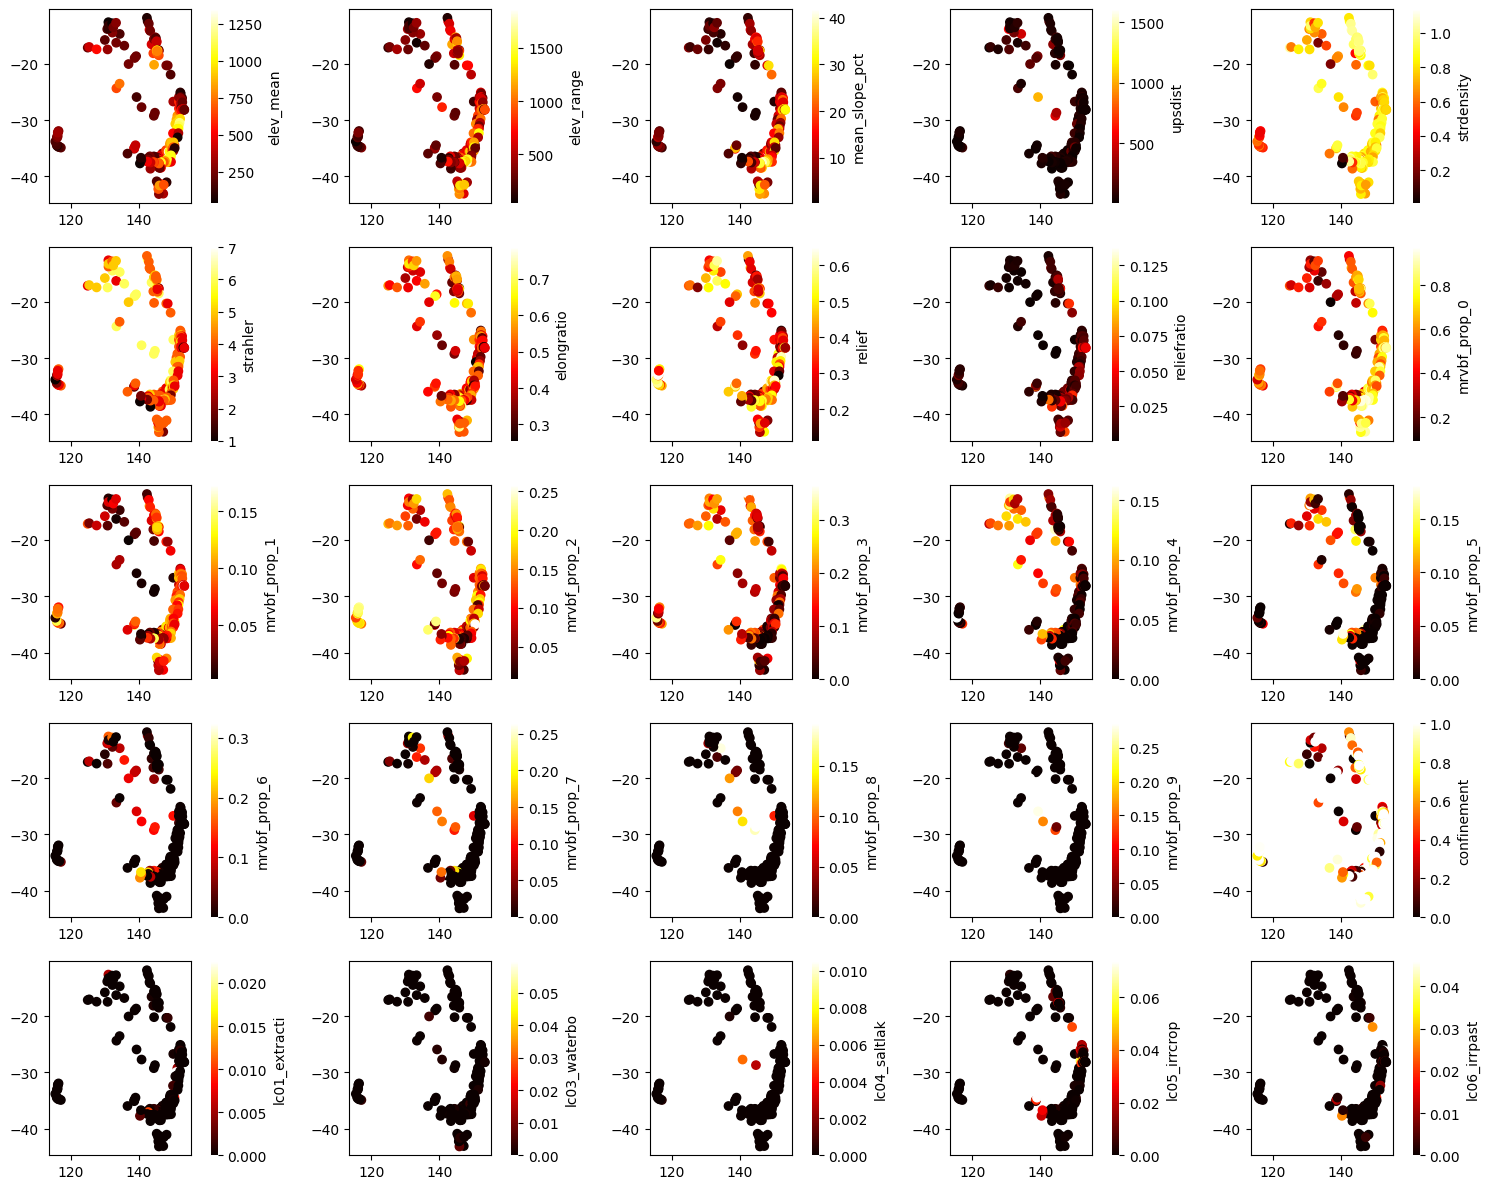

84


In [19]:
idx = 59
ax_num = 0

fig, axes = plt.subplots(5, 5, figsize=(15, 12))
axes = axes.flatten()

while ax_num < 25:
    
    val = static.iloc[:, idx]
    idx += 1
    
    try:
        c = val.astype(float).values.reshape(-1,)
             
        en = 222
        ax = axes[ax_num]
        ax, sc = scatter(long[0:en], lat[0:en], c=c[0:en], cmap="hot", show=False, ax=ax) 

        process_cbar(ax, sc, border=False, title=val.name, #title_kws ={"fontsize": 14}
                    )
        ax_num += 1
    except ValueError:
        continue
    


plt.tight_layout()
plt.show()
print(idx)

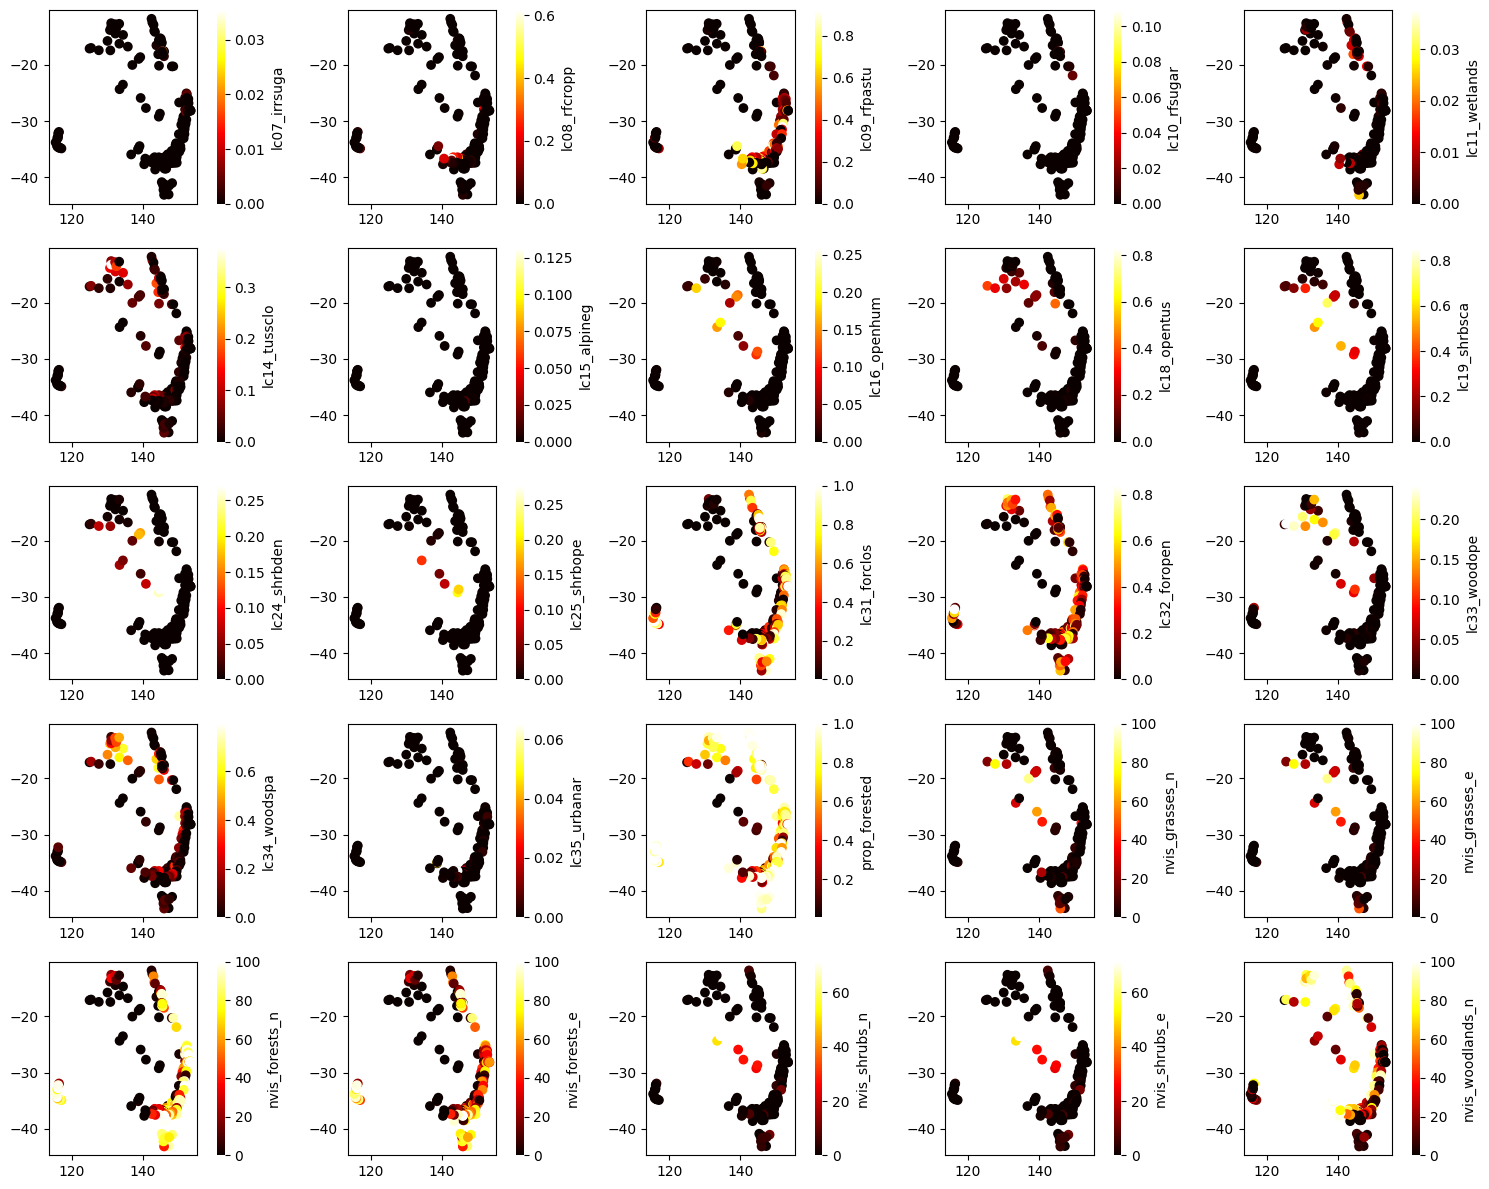

109


In [20]:
idx = 84
ax_num = 0

fig, axes = plt.subplots(5, 5, figsize=(15, 12))
axes = axes.flatten()

while ax_num < 25:
    
    val = static.iloc[:, idx]
    idx += 1
    
    try:
        c = val.astype(float).values.reshape(-1,)
             
        en = 222
        ax = axes[ax_num]
        ax, sc = scatter(long[0:en], lat[0:en], c=c[0:en], cmap="hot", show=False, ax=ax) 

        process_cbar(ax, sc, border=False, title=val.name, #title_kws ={"fontsize": 14}
                    )
        ax_num += 1
    except ValueError:
        continue
    


plt.tight_layout()
plt.show()
print(idx)

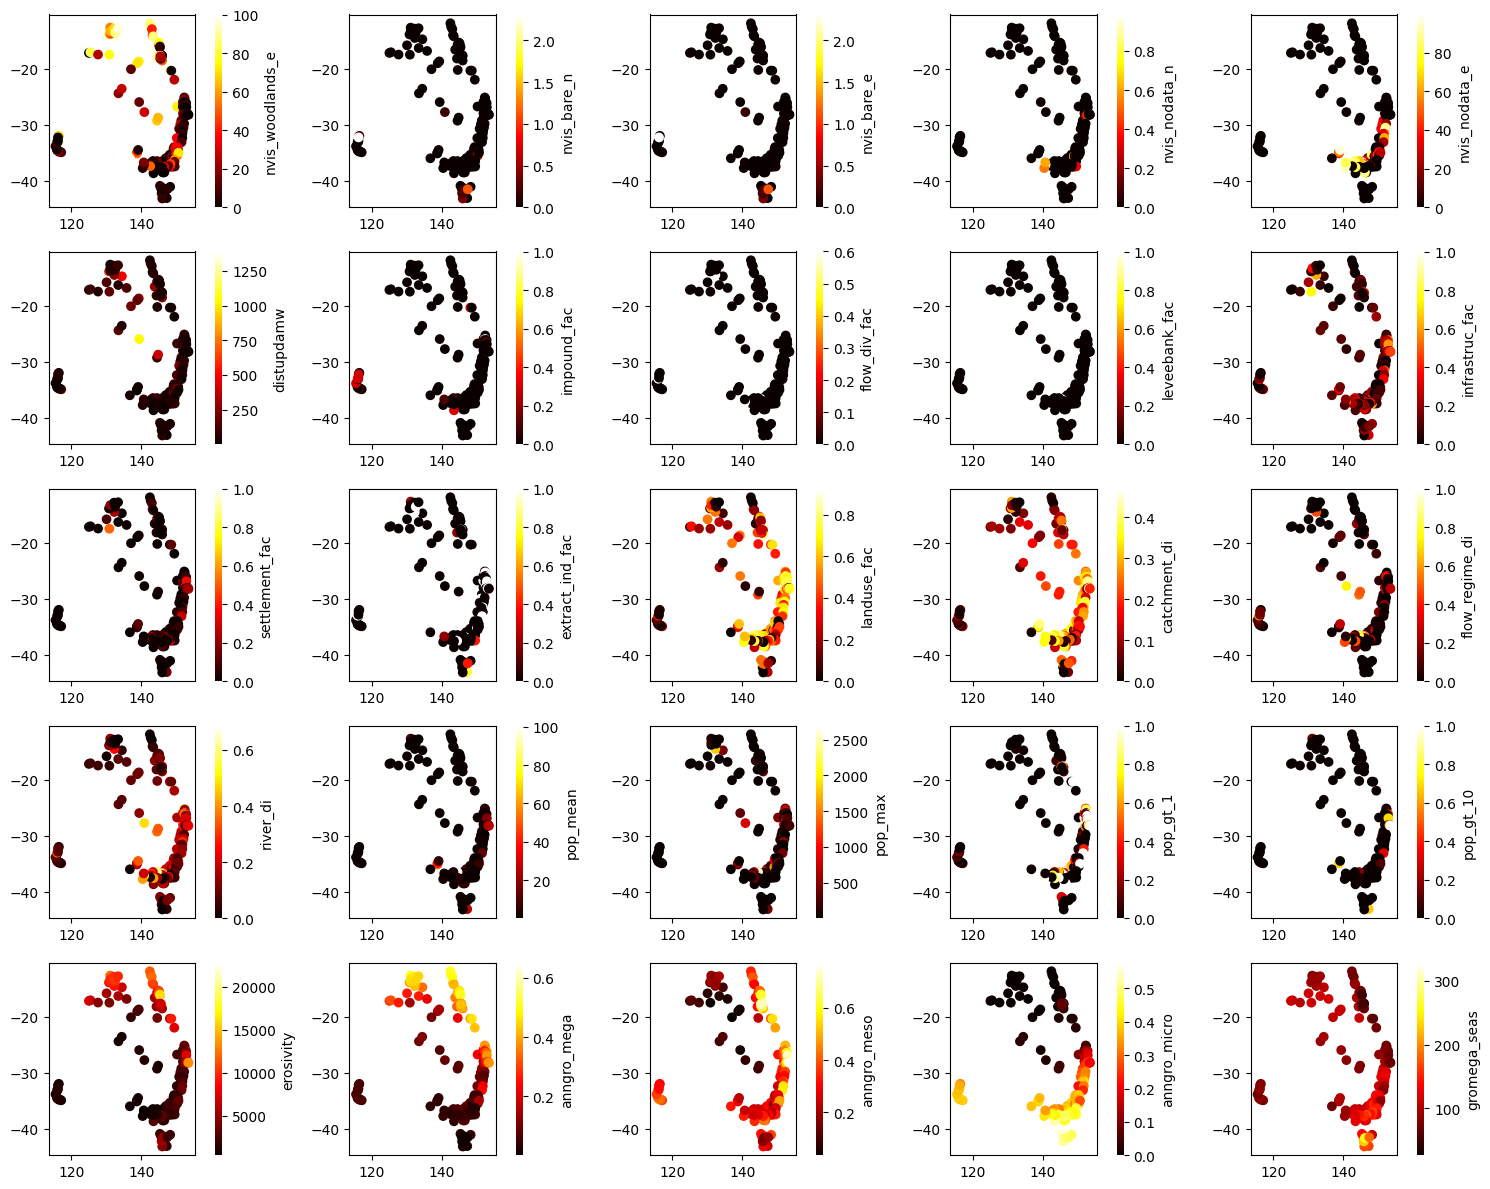

134


In [21]:
idx = 109
ax_num = 0

fig, axes = plt.subplots(5, 5, figsize=(15, 12))
axes = axes.flatten()

while ax_num < 25:
    
    val = static.iloc[:, idx]
    idx += 1
    
    try:
        c = val.astype(float).values.reshape(-1,)
             
        en = 222
        ax = axes[ax_num]
        ax, sc = scatter(long[0:en], lat[0:en], c=c[0:en], cmap="hot", show=False, ax=ax) 

        process_cbar(ax, sc, border=False, title=val.name, #title_kws ={"fontsize": 14}
                    )
        ax_num += 1
    except ValueError:
        continue

plt.tight_layout()
plt.show()
print(idx)

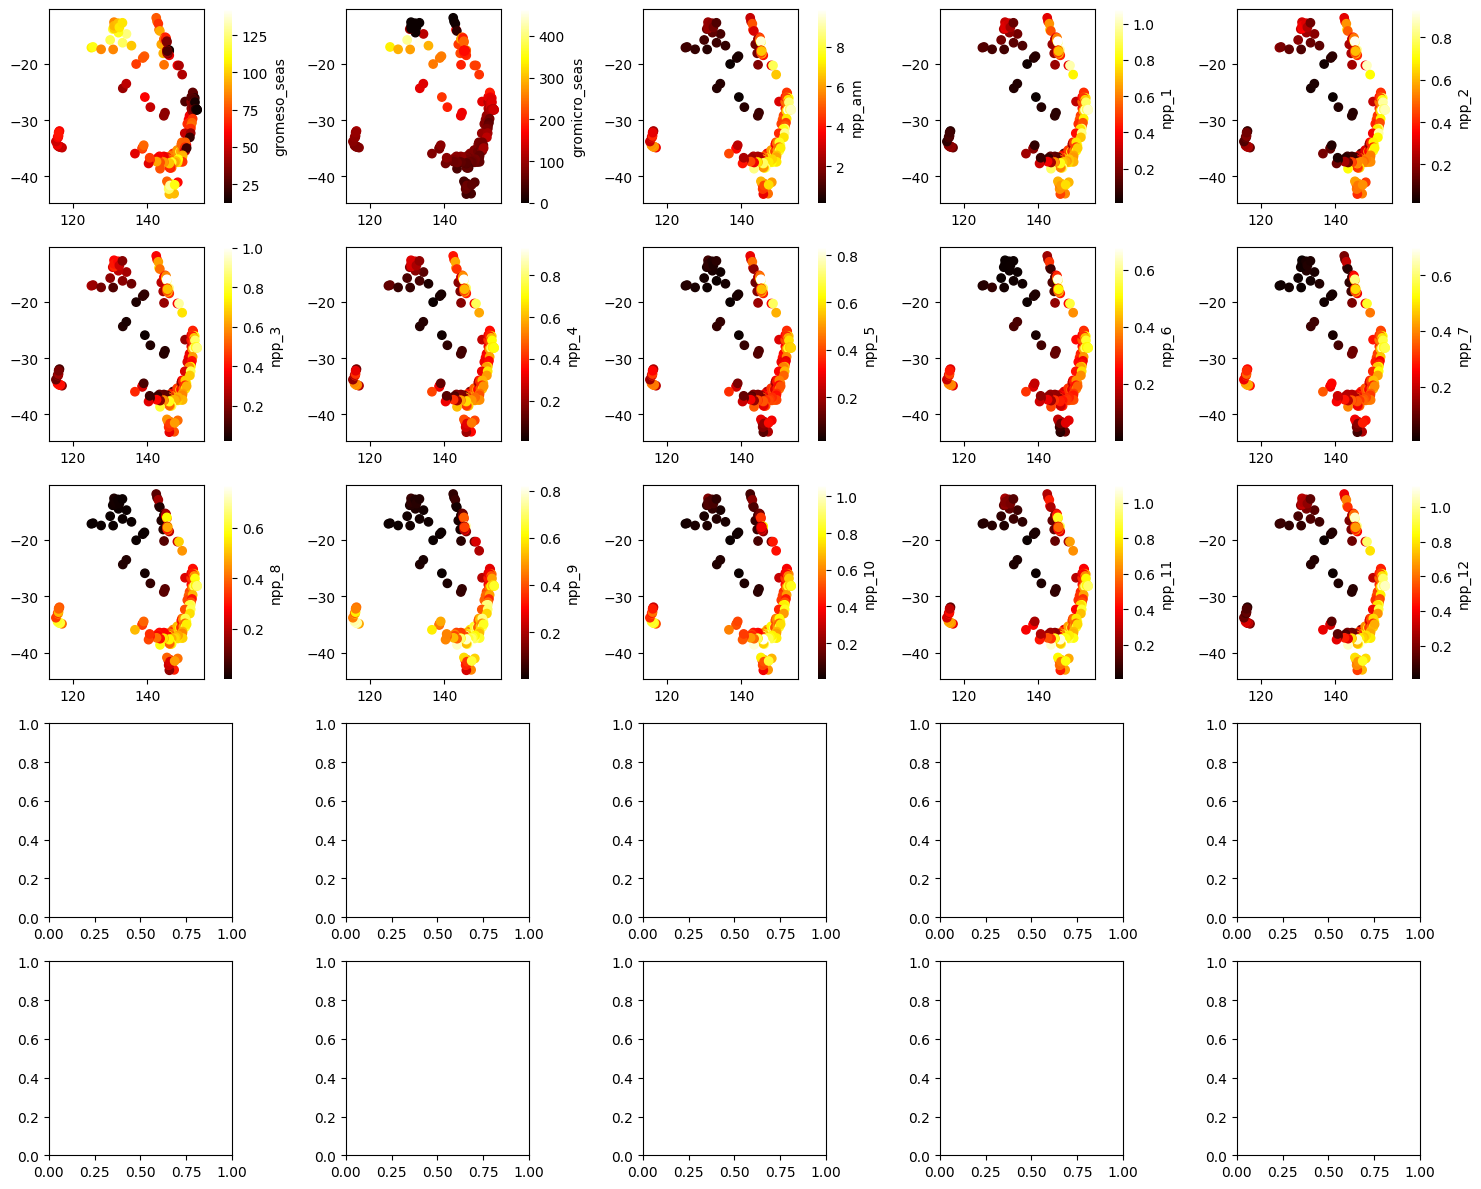

149


In [22]:
idx = 134
ax_num = 0

fig, axes = plt.subplots(5, 5, figsize=(15, 12))
axes = axes.flatten()

while ax_num < 25 and idx<static.shape[1]:
    
    val = static.iloc[:, idx]
    idx += 1
    
    try:
        c = val.astype(float).values.reshape(-1,)
             
        en = 222
        ax = axes[ax_num]
        ax, sc = scatter(long[0:en], lat[0:en], c=c[0:en], cmap="hot", show=False, ax=ax) 

        process_cbar(ax, sc, border=False, title=val.name, #title_kws ={"fontsize": 14}
                    )
        ax_num += 1
    except ValueError:
        continue

plt.tight_layout()
plt.show()
print(idx)

### Dyanmic Features

In [23]:
dataset.dynamic_features

['streamflow_MLd',
 'streamflow_MLd_inclInfilled',
 'streamflow_mmd',
 'et_morton_actual_SILO',
 'et_morton_point_SILO',
 'et_morton_wet_SILO',
 'et_short_crop_SILO',
 'et_tall_crop_SILO',
 'evap_morton_lake_SILO',
 'evap_pan_SILO',
 'evap_syn_SILO',
 'precipitation_AWAP',
 'precipitation_SILO',
 'precipitation_var_SWAP',
 'solarrad_AWAP',
 'tmax_AWAP',
 'tmin_AWAP',
 'vprp_AWAP',
 'mslp_SILO',
 'radiation_SILO',
 'rh_tmax_SILO',
 'rh_tmin_SILO',
 'tmax_SILO',
 'tmin_SILO',
 'vp_deficit_SILO',
 'vp_SILO']

### Streamflow

streamflow normalized by area

In [24]:
streamflow = dataset.q_mmd()

streamflow.shape

(21184, 222)

In [25]:
streamflow

912101A   912105A   915011A   917107A   919003A  919201A  \
time                                                                    
1957-01-01       NaN       NaN       NaN       NaN       NaN      NaN   
1957-01-02       NaN       NaN       NaN       NaN       NaN      NaN   
1957-01-03       NaN       NaN       NaN       NaN       NaN      NaN   
1957-01-04       NaN       NaN       NaN       NaN       NaN      NaN   
1957-01-05       NaN       NaN       NaN       NaN       NaN      NaN   
...              ...       ...       ...       ...       ...      ...   
2014-12-27  0.033409  0.032417  0.000000  0.010655  0.003816      0.0   
2014-12-28  0.037260  0.028840  0.000000  0.010369  0.002212      0.0   
2014-12-29  0.037653  0.027334  0.000000  0.010321  0.001903      0.0   
2014-12-30  0.032432  0.027785  0.000000  0.028903  0.001662      0.0   
2014-12-31  0.032191  0.169300  0.003321  0.042891  0.002262      0.0   

            919309A  922101B   925001A   926002A  ...    304499    305202  \
time                                              ...                       
1957-01-01      NaN      NaN       NaN       NaN  ...       NaN       NaN   
1957-01-02      NaN      NaN       NaN       NaN  ...       NaN       NaN   
1957-01-03      NaN      NaN       NaN       NaN  ...       NaN       NaN   
1957-01-04      NaN      NaN       NaN       NaN  ...       NaN       NaN   
1957-01-05      NaN      NaN       NaN       NaN  ...       NaN       NaN   
...             ...      ...       ...       ...  ...       ...       ...   
2014-12-27      0.0      0.0  0.036582  0.300530  ...  0.505348  0.447075   
2014-12-28      0.0      0.0  0.036308  0.293852  ...  0.506314  0.126054   
2014-12-29      0.0      0.0  0.036154  0.292314  ...  0.482631  0.057792   
2014-12-30      0.0      0.0  0.034776  0.293543  ...  0.548162  0.041354   
2014-12-31      0.0      0.0  0.034613  0.291518  ...  2.707964  0.135351   

               307473     308145     308799    312061    314207    314213  \
time                                                                        
1957-01-01        NaN  24.086996        NaN  4.093378       NaN       NaN   
1957-01-02        NaN   8.254936        NaN  4.266787       NaN       NaN   
1957-01-03        NaN   4.943169        NaN  4.095510       NaN       NaN   
1957-01-04        NaN   3.404512        NaN  4.297611       NaN       NaN   
1957-01-05        NaN   3.317023        NaN  4.293357       NaN       NaN   
...               ...        ...        ...       ...       ...       ...   
2014-12-27   2.489122   1.391061   1.407268  0.547383  0.415754  0.093841   
2014-12-28   2.198925   1.255558   1.330847  0.524695  0.386941  0.084121   
2014-12-29   1.557511   1.061568   1.150340  0.501252  0.378870  0.075581   
2014-12-30   1.354081  12.621202  17.800031  0.731634  0.387640  0.078101   
2014-12-31  11.706610  10.158581   9.200823  1.745331  1.042905  0.134921   

              315450    318076  
time                            
1957-01-01       NaN  0.614182  
1957-01-02       NaN  0.691010  
1957-01-03       NaN  0.559474  
1957-01-04       NaN  0.508319  
1957-01-05       NaN  0.478276  
...              ...       ...  
2014-12-27  0.944416  0.243313  
2014-12-28  0.881395  0.219409  
2014-12-29  0.802402  0.207761  
2014-12-30  7.128175  0.205275  
2014-12-31  6.993984  0.223863  

[21184 rows x 222 columns]

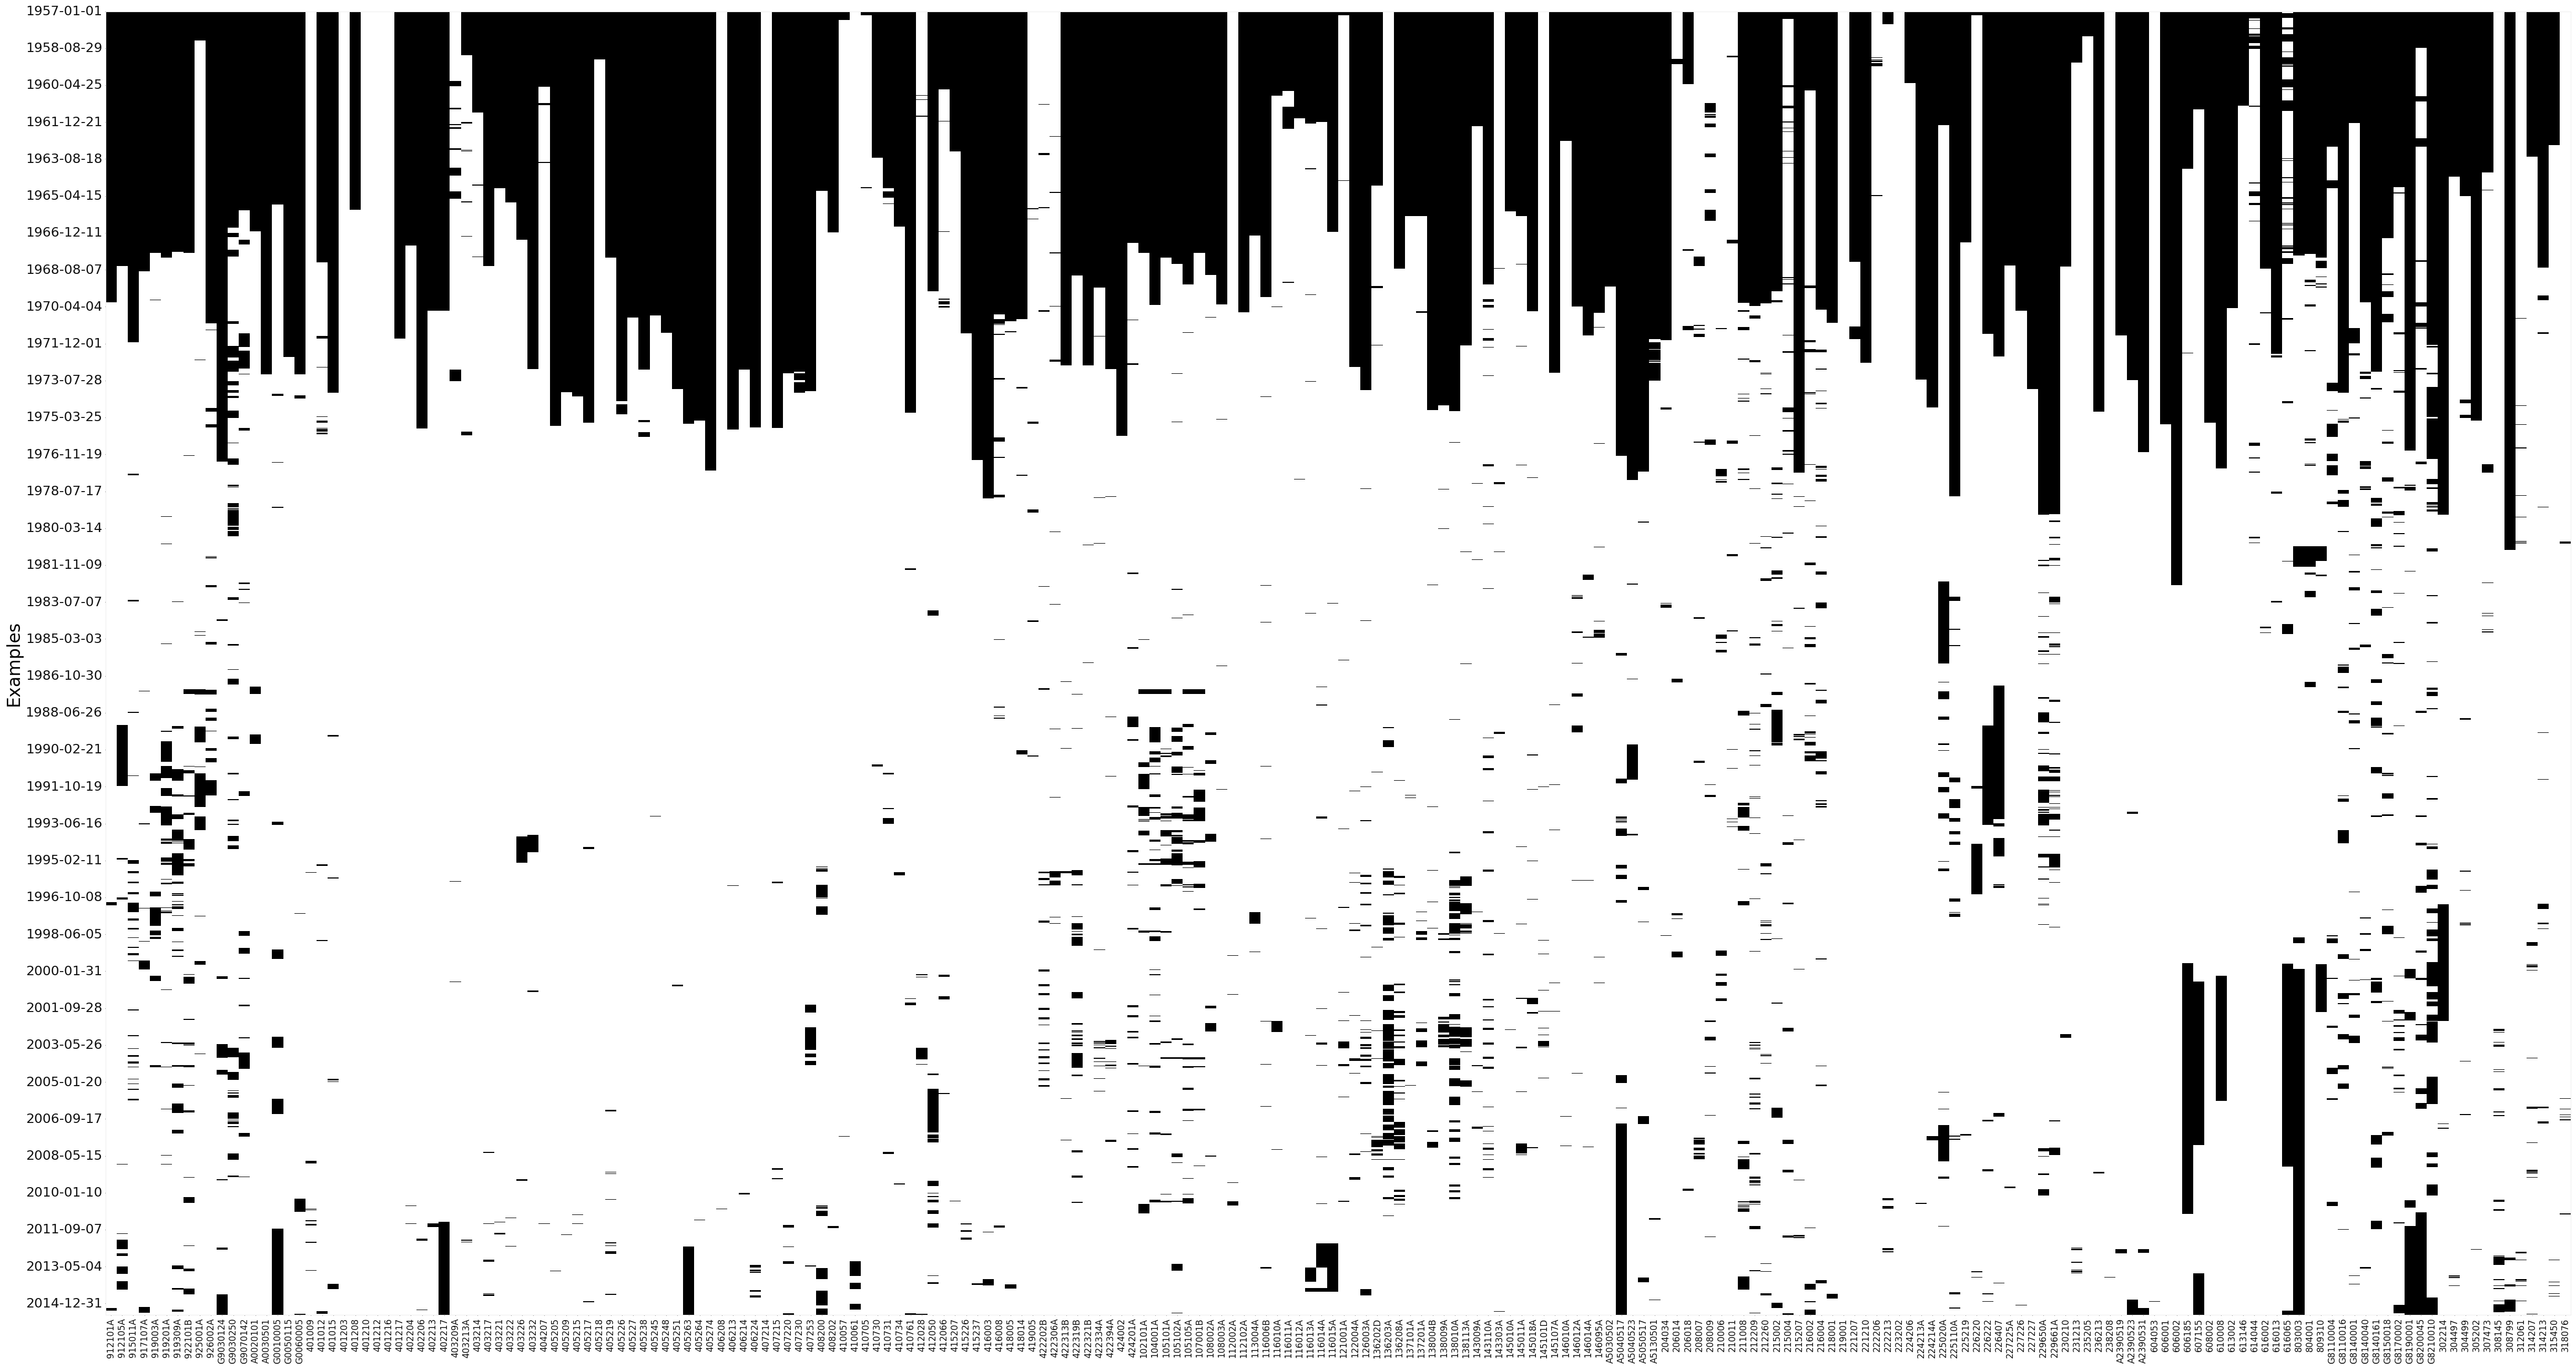

<AxesSubplot: ylabel='Examples'>

In [26]:
EDA(data=streamflow, save=False).heatmap()

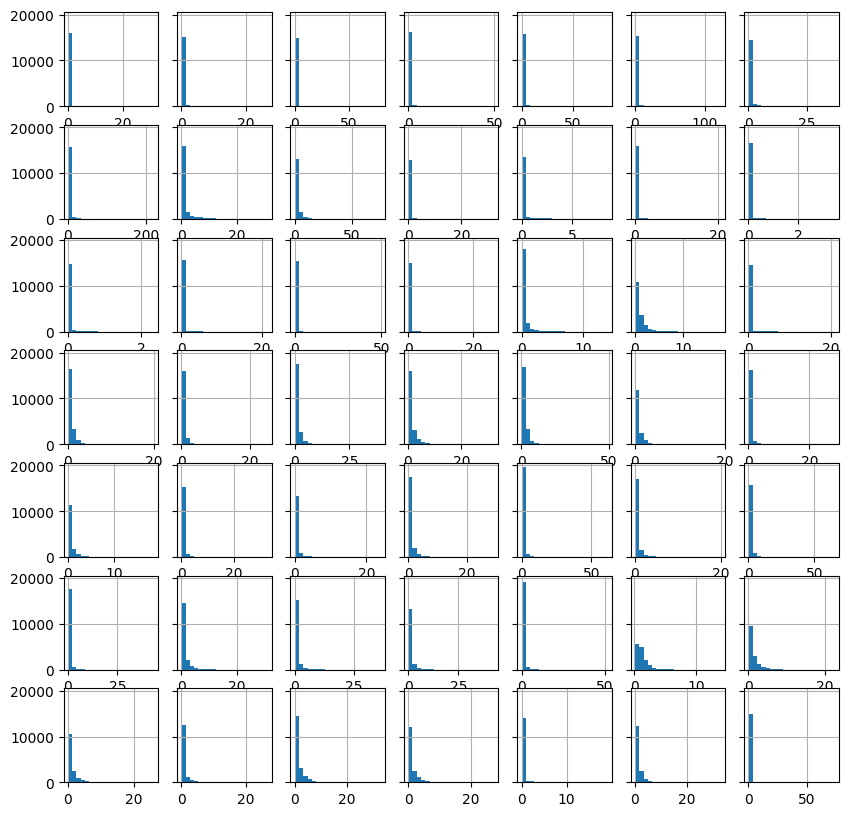

In [27]:
fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

for idx, ax in enumerate(axes.flat):
    
    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )

plt.show()

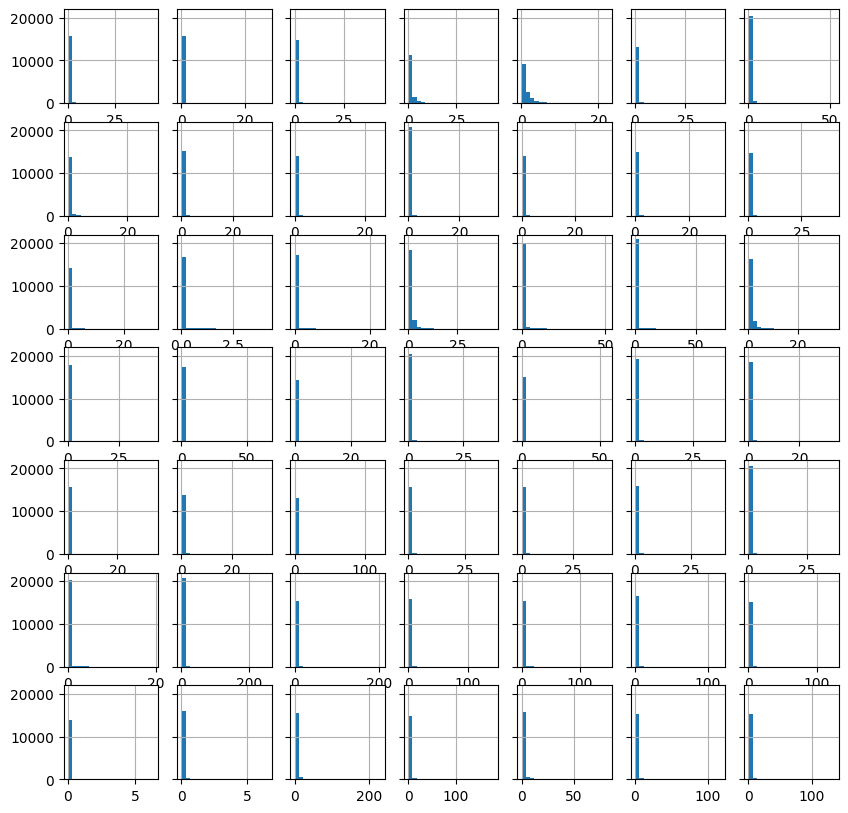

98


In [28]:
st = 49

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    
    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

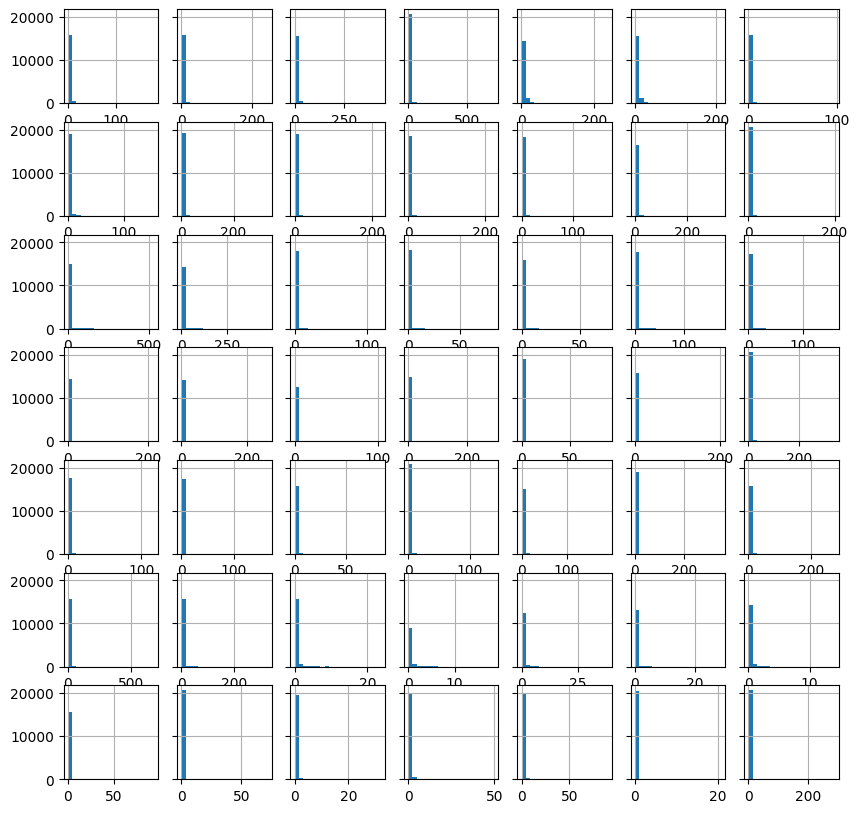

147


In [29]:
st = 98

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    
    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

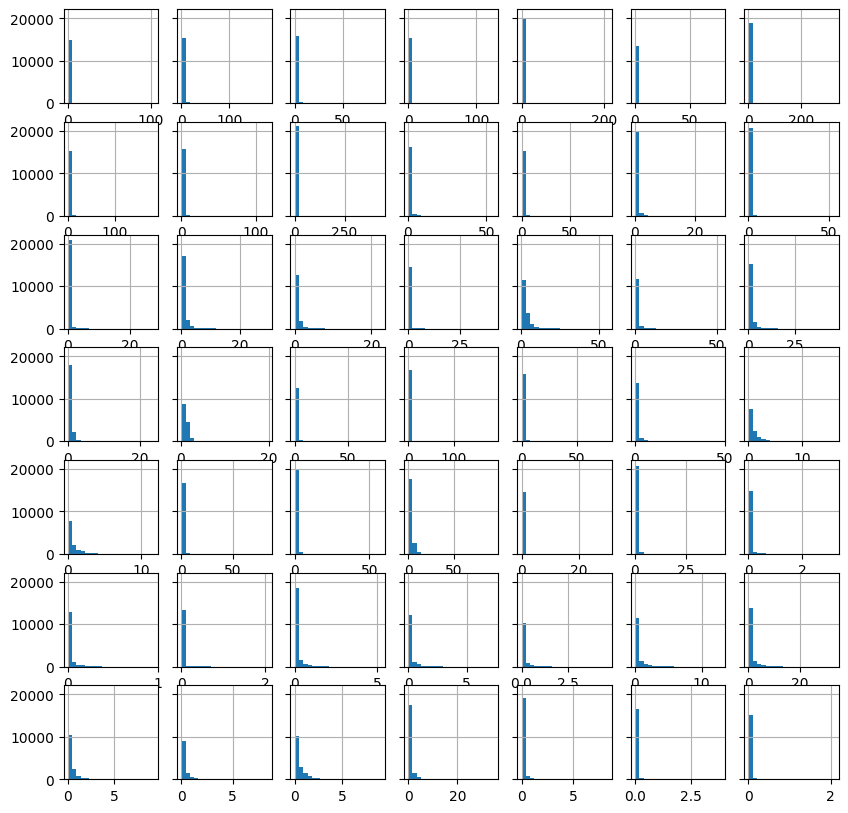

196


In [30]:
st = 147

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    
    hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

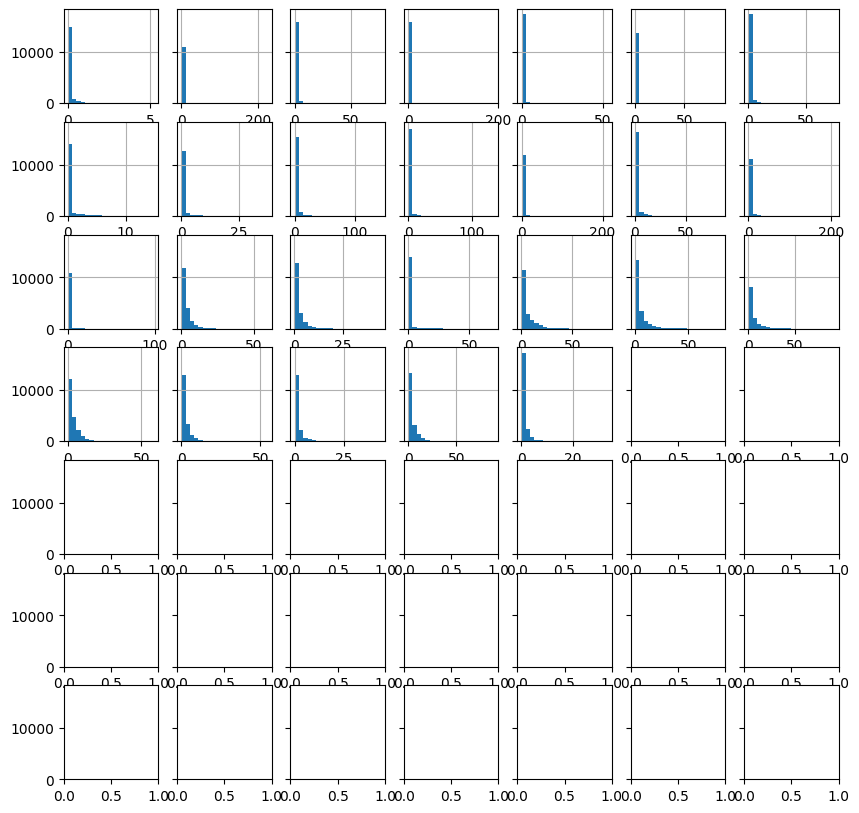

245


In [31]:
st = 196

fig, axes = plt.subplots(7, 7, figsize=(10, 10), sharey="all")

idx = st
for _, ax in enumerate(axes.flat):
    
    if idx > 221:
        pass
    else:
        hist(streamflow.iloc[:, idx].values.reshape(-1,),
         bins=20,
         ax=ax,
         show=False
        )
    
    idx += 1

plt.show()
print(idx)

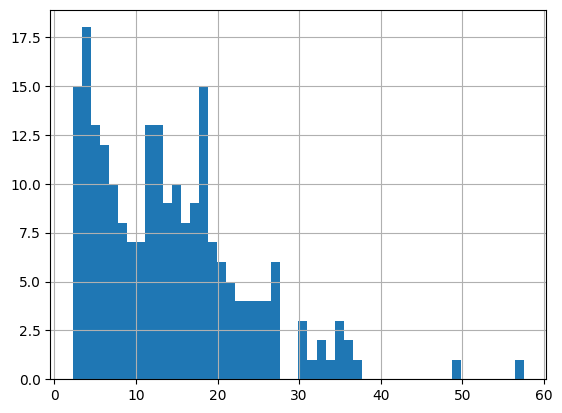

In [32]:
_ = hist(streamflow.skew().values.reshape(-1,), bins=50)

### Evapotranspiration

(21184, 222)
912101A    0
912105A    0
915011A    0
917107A    0
919003A    0
          ..
312061     0
314207     0
314213     0
315450     0
318076     0
Length: 222, dtype: int64


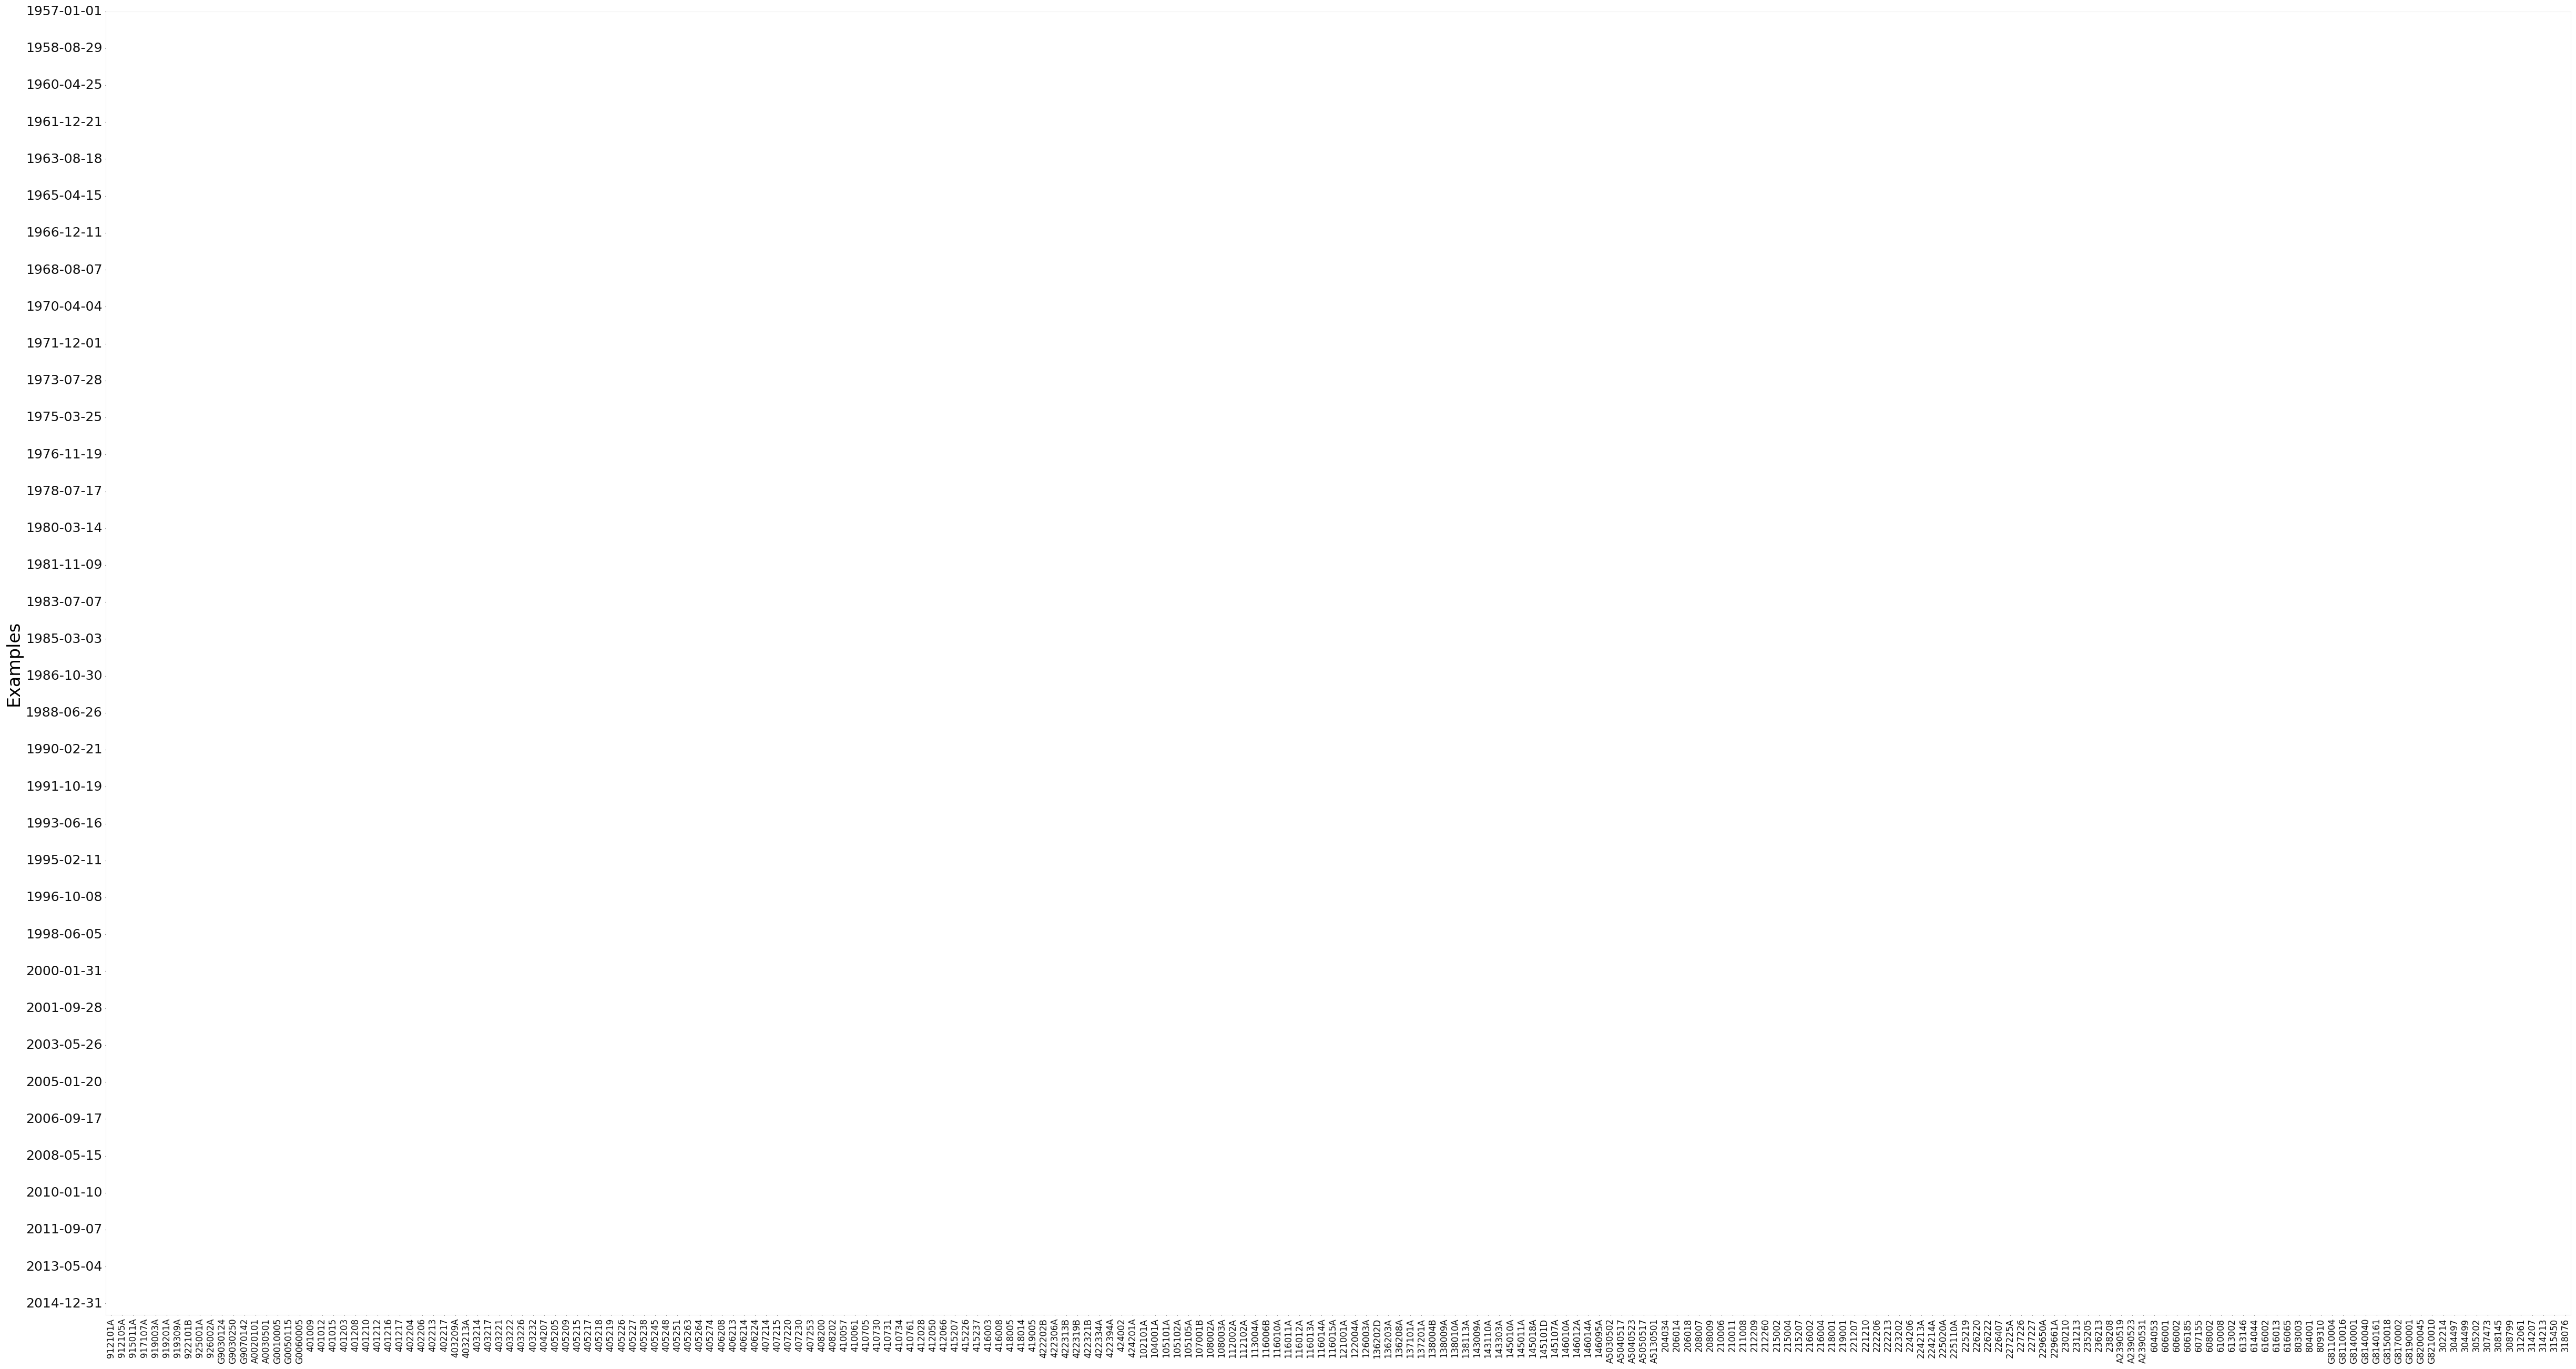

<AxesSubplot: ylabel='Examples'>

In [60]:
et_morton_actual_SILO = dataset.fetch(dynamic_features = 'et_morton_actual_SILO', as_dataframe=True)
et_morton_actual_SILO = et_morton_actual_SILO.reset_index()
et_morton_actual_SILO.index = pd.to_datetime(et_morton_actual_SILO.pop('time'))
et_morton_actual_SILO.pop('dynamic_features')
print(et_morton_actual_SILO.shape)
print(et_morton_actual_SILO.isna().sum())
EDA(data=et_morton_actual_SILO, save=False).heatmap()

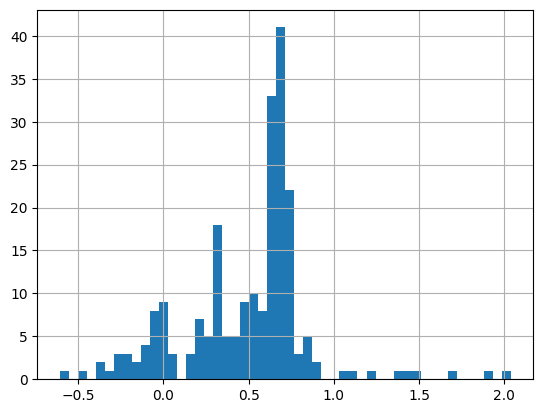

In [61]:
_ = hist(et_morton_actual_SILO.skew().values.reshape(-1,), bins=50)

#### Air Temperature

In [ ]:
tmax_SILO = dataset.fetch(dynamic_features = 'tmax_SILO', as_dataframe=True)
tmax_SILO = tmax_SILO.reset_index()
tmax_SILO.index = pd.to_datetime(tmax_SILO.pop('time'))
tmax_SILO.pop('dynamic_features')
print(tmax_SILO.shape)

tmin_SILO = dataset.fetch(dynamic_features = 'tmin_SILO', as_dataframe=True)
tmin_SILO = tmin_SILO.reset_index()
tmin_SILO.index = pd.to_datetime(tmin_SILO.pop('time'))
tmin_SILO.pop('dynamic_features')
print(tmin_SILO.shape)

tavg = np.mean([tmax_SILO.values, tmin_SILO.values], axis=0)
print(tavg.shape)

tavg = pd.DataFrame(tavg, index = tmin_SILO.index, columns=tmin_SILO.columns.tolist())
print(tavg.shape)

EDA(data=tavg, save=False).heatmap()

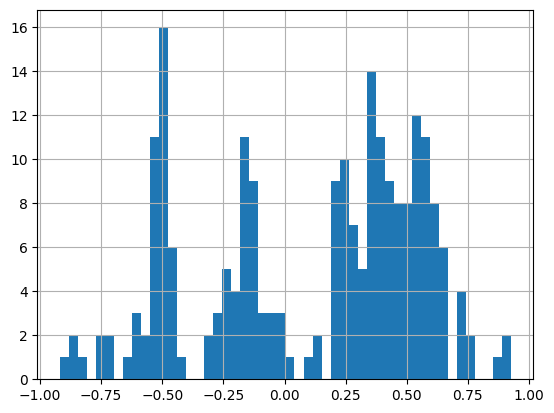

In [66]:

_ = hist(tavg.skew().values.reshape(-1,), bins=50)

#### Precipitation

(21184, 222)


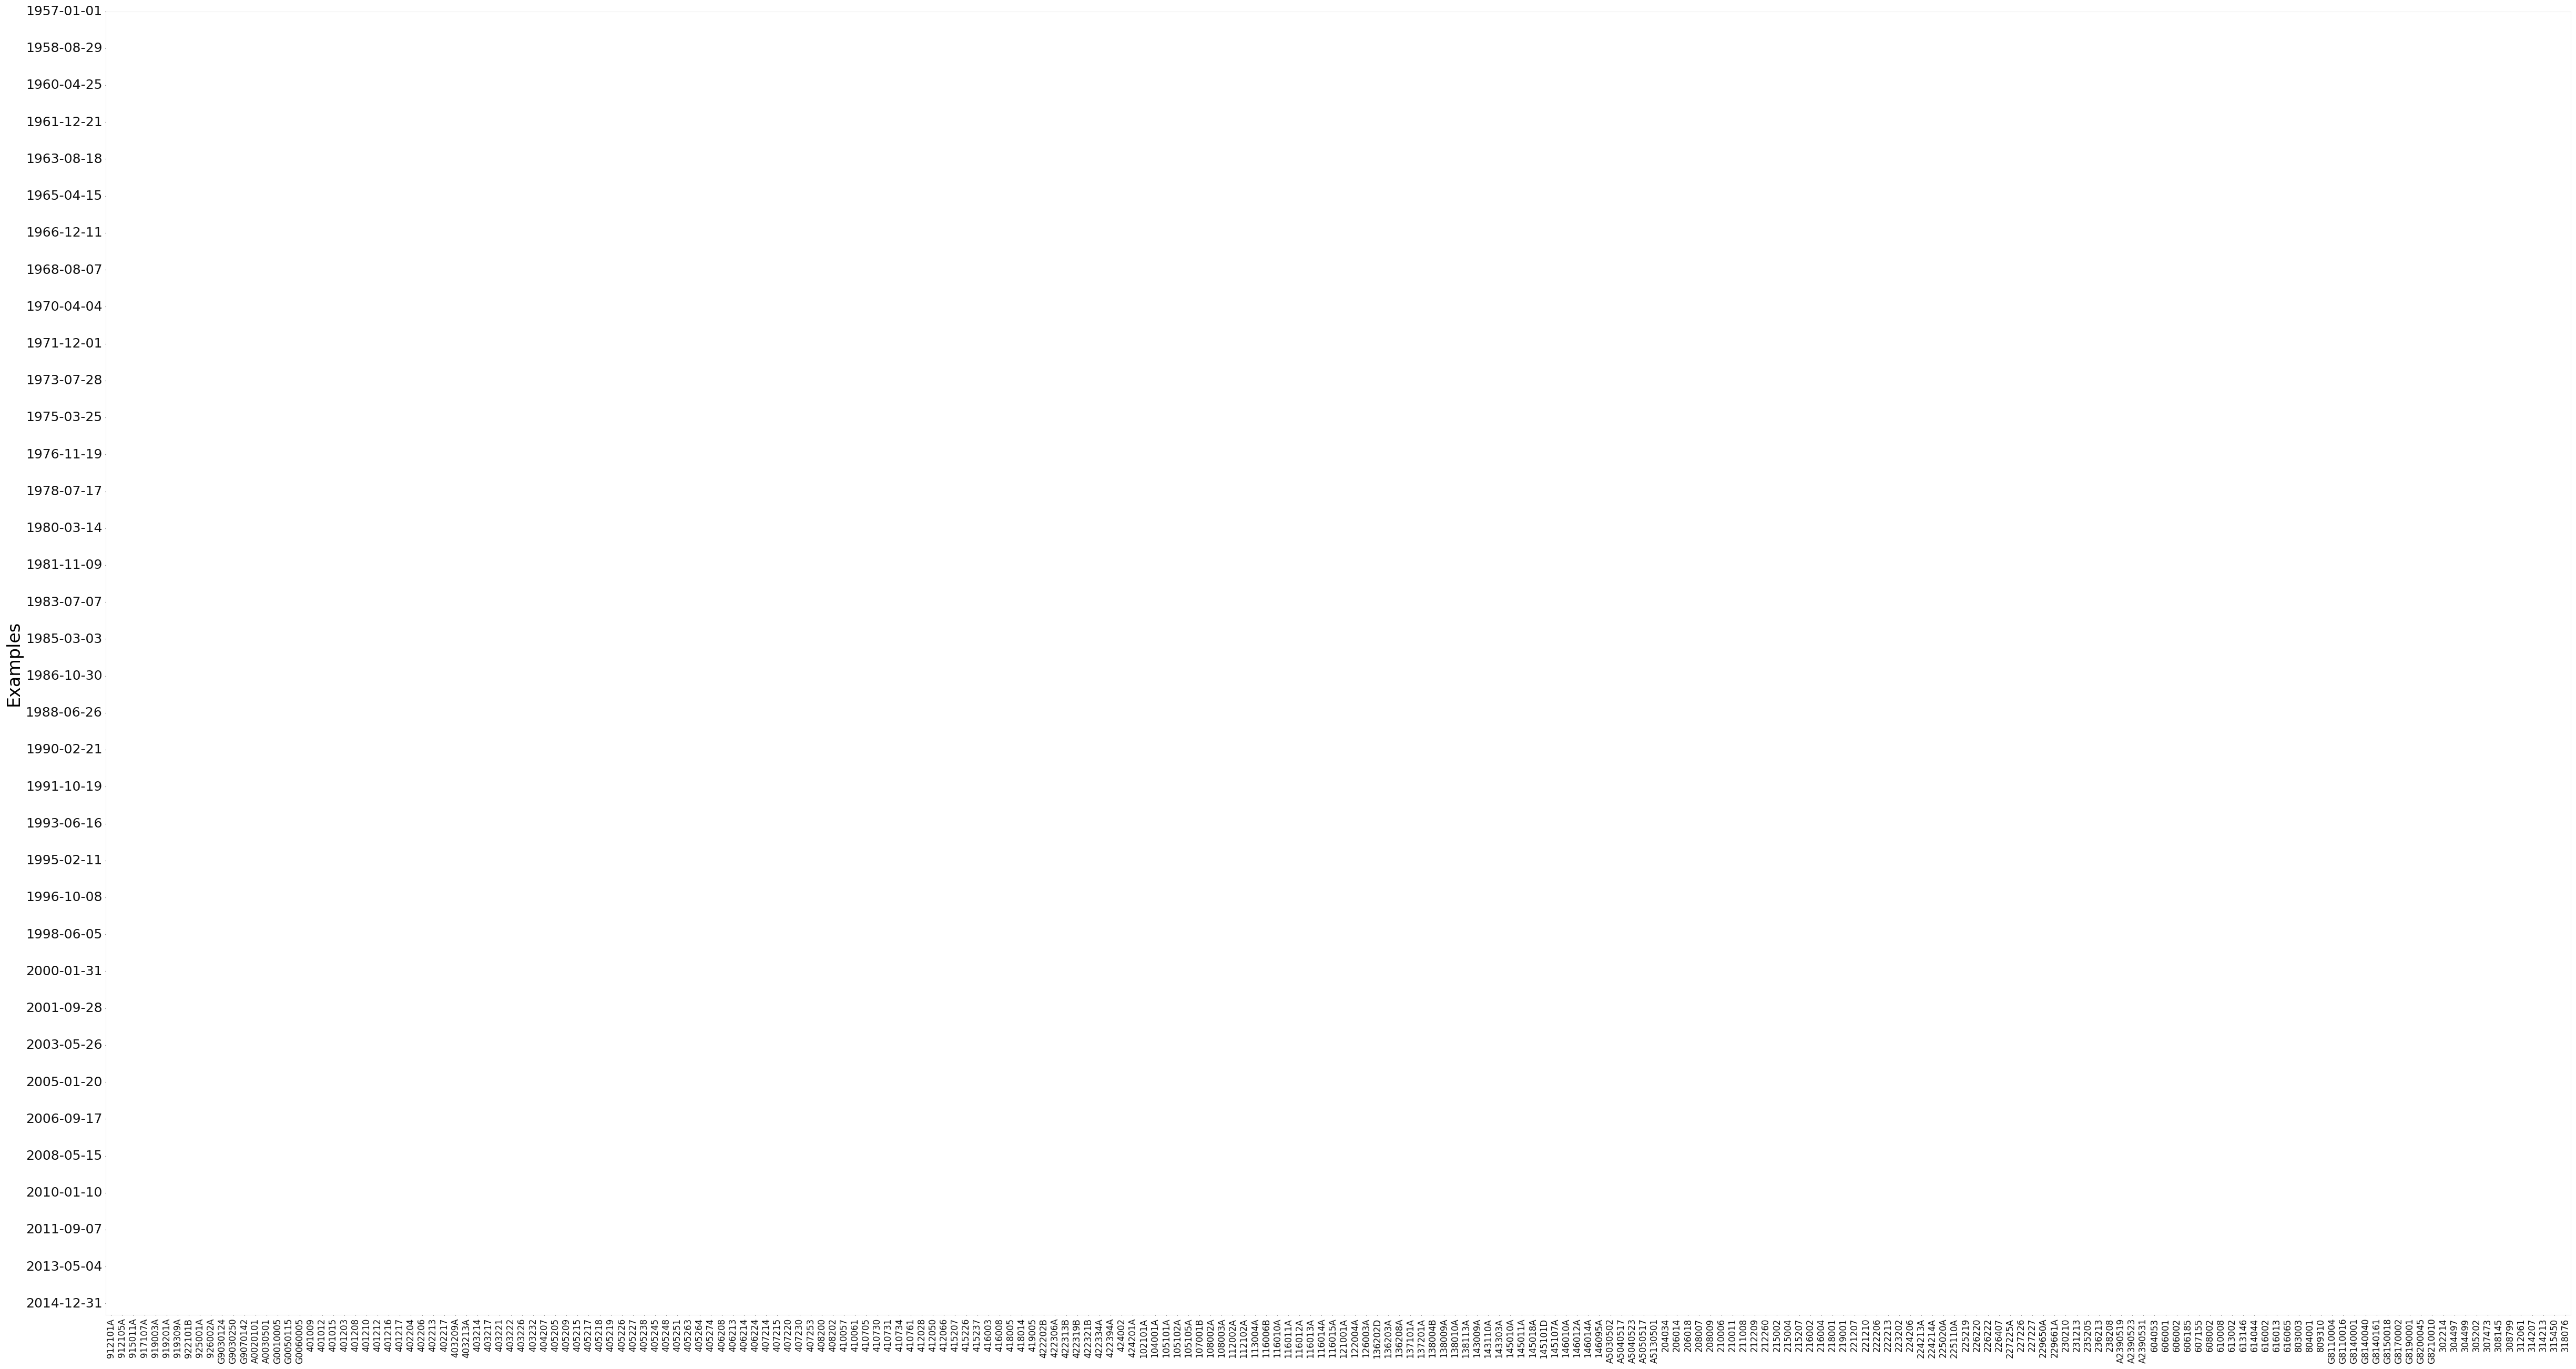

<AxesSubplot: ylabel='Examples'>

In [64]:
pcp = dataset.fetch(dynamic_features = 'precipitation_SILO', as_dataframe=True)
pcp = pcp.reset_index()
pcp.index = pd.to_datetime(pcp.pop('time'))
pcp.pop('dynamic_features')
print(pcp.shape) 
EDA(data=pcp, save=False).heatmap()

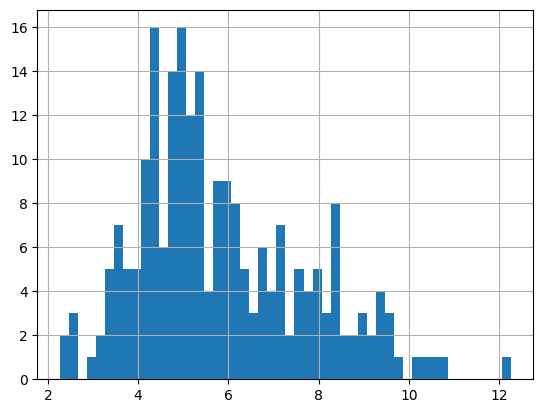

In [65]:
_ = hist(pcp.skew().values.reshape(-1,), bins=50)